#### Coding Samurai Internship Project - Task_5: Time Series Forecasting for Apple (AAPL) Stock Prices Using ARIMA
##### This project uses **daily closing prices** of Apple Inc. (AAPL) from 2020 to 2025-05-05, extracted from Yahoo Finance. The dataset is applied to explore **time series forecasting model** **ARIMA**, with the goals of predicting future stock prices. Workflow Demonstrated;
- ###### **Data Acquisition**
- ###### **Data Information**
- ###### **Data Exploration**
- ###### **Data Preparation**
- ###### **Modeling**
- ###### **Prediction**  
- ###### **Evaluation**
- ###### **Future Prediction**
- ###### **Insights**

In [53]:
# Importing the required libraries
import yfinance as yf            # to fetch stock data
import pandas as pd              # for data handling
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for visualization

##### Data Acquisition from yfinace

In [54]:
# Downloading Apple stock data for the last 5 years
ticker = yf.Ticker("AAPL")
apple_data = ticker.history(start="2020-05-05", end="2025-05-05")


###### Data Information

In [56]:
# Showing the first 5 rows and datatypes
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-05 00:00:00-04:00,71.430032,72.868026,71.284778,72.035248,147751200,0.000,0.0
2020-05-06 00:00:00-04:00,72.737292,73.410292,72.352375,72.778450,142333600,0.000,0.0
2020-05-07 00:00:00-04:00,73.405436,73.877508,73.102828,73.531319,115215200,0.000,0.0
2020-05-08 00:00:00-04:00,74.191594,75.334905,73.863891,75.281502,133838400,0.205,0.0
2020-05-11 00:00:00-04:00,74.788741,76.961275,74.579979,76.466087,145946400,0.000,0.0


In [57]:
# Data info and shape
print(apple_data.info())

# Checking for missing values
print(apple_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-05-05 00:00:00-04:00 to 2025-05-02 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1256 non-null   float64
 1   High          1256 non-null   float64
 2   Low           1256 non-null   float64
 3   Close         1256 non-null   float64
 4   Volume        1256 non-null   int64  
 5   Dividends     1256 non-null   float64
 6   Stock Splits  1256 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.5 KB
None
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


###### Data Exploration (EDA)

In [58]:
# Summary Statistics
apple_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03,1256.000000,1256.000000
mean,161.875406,163.705459,160.191281,162.044329,8.201317e+07,0.003646,0.003185
std,39.334705,39.631835,39.109714,39.419793,4.233931e+07,0.028745,0.112867
min,71.430032,72.868026,71.284778,72.035248,2.323470e+07,0.000000,0.000000
25%,133.495549,135.659540,132.175904,133.597931,5.300062e+07,0.000000,0.000000
50%,159.345600,161.604366,157.133848,159.827065,7.141350e+07,0.000000,0.000000
75%,185.896584,187.381613,184.272381,185.989616,9.771435e+07,0.000000,0.000000
max,257.276679,259.179926,256.718662,258.103729,3.743368e+08,0.250000,4.000000


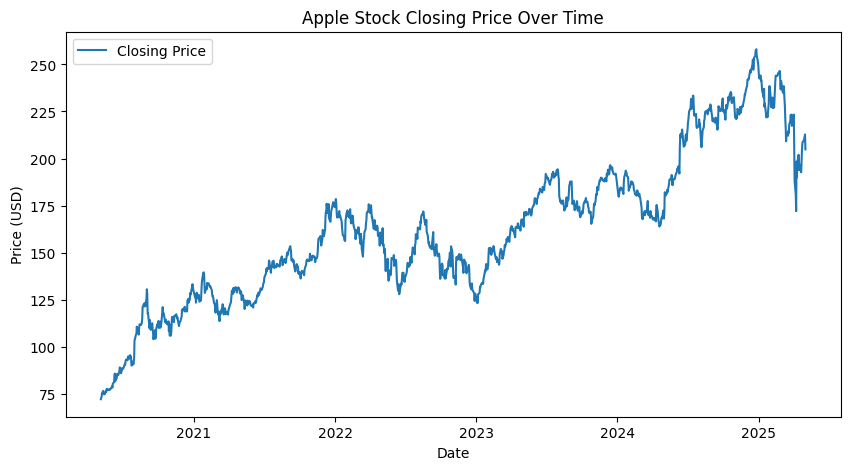

In [59]:
# Visualization
plt.figure(figsize=(10,5))
plt.plot(apple_data['Close'], label="Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Apple Stock Closing Price Over Time")
plt.legend()
plt.show()

###### Stationarity Check

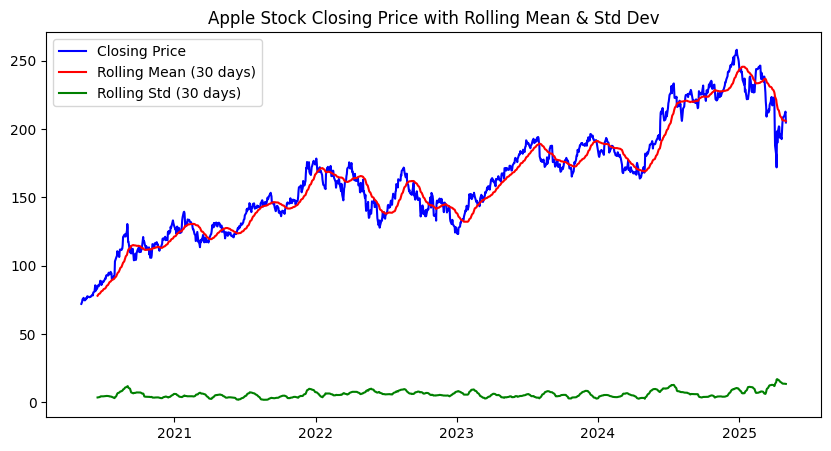

In [60]:
# Visual Inspection of Stationarity
# Rolling statistics (30-day window)
rolling_mean = apple_data['Close'].rolling(window=30).mean()
rolling_std = apple_data['Close'].rolling(window=30).std()

plt.figure(figsize=(10,5))
plt.plot(apple_data['Close'], color='blue', label="Closing Price")
plt.plot(rolling_mean, color='red', label="Rolling Mean (30 days)")
plt.plot(rolling_std, color='green', label="Rolling Std (30 days)")
plt.legend()
plt.title("Apple Stock Closing Price with Rolling Mean & Std Dev")
plt.show()

###### Interpretation: Mean is changing (trend upward), the series is non-stationary.

In [61]:
# Mathematical Test for Stationarity
from statsmodels.tsa.stattools import adfuller

# Runing the test on the closing price
result = adfuller(apple_data['Close'])

# Printing the results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -2.0984459236797366
p-value: 0.24513996242303193
Critical Values:
   1%: -3.435571295403709
   5%: -2.863845736356174
   10%: -2.567997600196822


###### **Interpretation:** The P-value is 0.24 which is > 0.05, suggests **Non-Stationarity**

##### Data Preparation

###### **Spliting the Data(80/20)**

In [62]:
# Splitting the data into training and testing sets
train_size = int(len(apple_data['Close']) * 0.8)
train = apple_data['Close'][:train_size]
test = apple_data['Close'][train_size:]

##### Modelling

###### Finding the Best ARIMA Model (Manual AIC Comparison)

In [63]:
import warnings
import itertools
import statsmodels.api as sm

# Dropping any NAN
y = apple_data['Close'].dropna()

# Expanding parameter range
p = d = q = range(0, 4)  # try 0,1,2,3

# Generating all possible combinations of p, d, and q.
pdq = list(itertools.product(p, d, q))

# Suppressing warning messages from failed models
warnings.filterwarnings("ignore")

best_aic = float("inf")
best_order = None
best_model = None

# Looping through all parameter combinations
for order in pdq:
    try:
        model = sm.tsa.ARIMA(y, order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
    except Exception as e:
        continue  # skip models that fail

# Displaying Results
print("Best ARIMA order:", best_order)
print("Best AIC:", best_aic)

Best ARIMA order: (3, 2, 3)
Best AIC: 6312.512469244677


###### **Fitting the Model**

In [80]:
from statsmodels.tsa.arima.model import ARIMA
# Training the model with best order (3,2,3)
modell = ARIMA(train, order=(3,2,3))
modell_fit = model.fit()

# Summary of the model
modell_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1256
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -3165.060
Date:                Wed, 10 Sep 2025   AIC                           6344.121
Time:                        09:18:43   BIC                           6380.054
Sample:                             0   HQIC                          6357.628
                               - 1256                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9890      0.019    -50.853      0.000      -1.027      -0.951
ar.L2          0.0315      0.030      1.044      0.296      -0.028       0.091
ar.L3          0.0219      0.022      0.976      0.329      -0.022       0.066
ma.L1         -0.9975      0.050    -19.828      0.000      -1.096      -0.899
ma.L2         -0.9998      0.099    -10.055      0.000      -1.195      -0.805
ma.L3          0.9974      0.050     20.015      0.000       0.900       1.095
sigma2         9.0006      0.437     20.598      0.000       8.144       9.857
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3377.75
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Evaluation

In [81]:
# Making Predictions for the test set
start = len(train)
end = len(train) + len(test) - 1


# Using the fitted model
pred = modell_fit.predict(start=start, end=end, typ='levels')
# Align indexes
pred.index = apple_data['Close'].index[start:end+1]
print(pred)

Date
2024-05-01 00:00:00-04:00    169.258448
2024-05-02 00:00:00-04:00    168.157432
2024-05-03 00:00:00-04:00    171.902115
2024-05-06 00:00:00-04:00    182.441241
2024-05-07 00:00:00-04:00    180.727543
                                ...    
2025-04-28 00:00:00-04:00    209.019924
2025-04-29 00:00:00-04:00    209.773290
2025-04-30 00:00:00-04:00    210.884287
2025-05-01 00:00:00-04:00    212.137704
2025-05-02 00:00:00-04:00    212.997310
Name: predicted_mean, Length: 252, dtype: float64


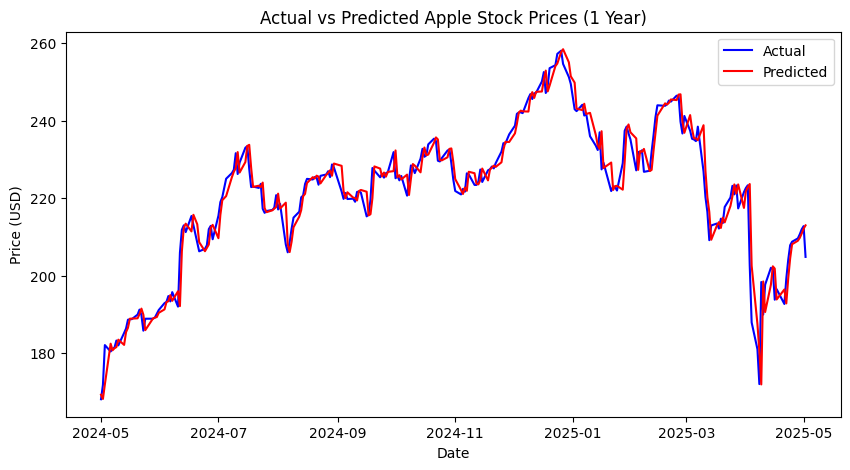

In [82]:
# Plotting Prediction to visualize comparison
plt.figure(figsize=(10,5))

# Plot actual vs predicted prices
plt.plot(test, label='Actual', color='blue')
plt.plot(pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Apple Stock Prices (1 Year)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
plt.show()

In [83]:
round(np.mean(test), 2)

np.float64(221.04)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Root mean squared error
rmse = sqrt(mean_squared_error(test, pred))
print("RMSE:", rmse)

# Mean absolute error
mae = mean_absolute_error(test, pred)
print("MAE:", mae)

RMSE: 4.2444591976576325
MAE: 2.814887555750052


In [85]:
import numpy as np

In [86]:
# Accuracy Check
mape = np.mean(np.abs(test - pred) / test) * 100
accuracy = 100 - mape
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

MAE: 2.8149
RMSE: 4.2445
MAPE: 1.30%
Accuracy: 98.70%


##### Future Predictions

In [90]:
# Forecast for 40 future business days (~3 months trading days)
future_predd = modell_fit.forecast(steps=60).rename("ARIMA Predictions")

# Generate matching business-day index starting after 2025-05-05
index_future_dates = pd.date_range(
    start="2025-05-06", periods=len(future_predd), freq="B"
)

# Assign new index
future_predd.index = index_future_dates

In [91]:
future_predd.head()

,ARIMA Predictions
2025-05-06,204.877680
2025-05-07,204.848079
2025-05-08,204.931779
2025-05-09,205.072326
2025-05-12,205.155027


In [92]:
future_predd.tail()

,ARIMA Predictions
2025-07-22,208.251123
2025-07-23,208.231185
2025-07-24,208.264425
2025-07-25,208.240532
2025-07-28,208.269655


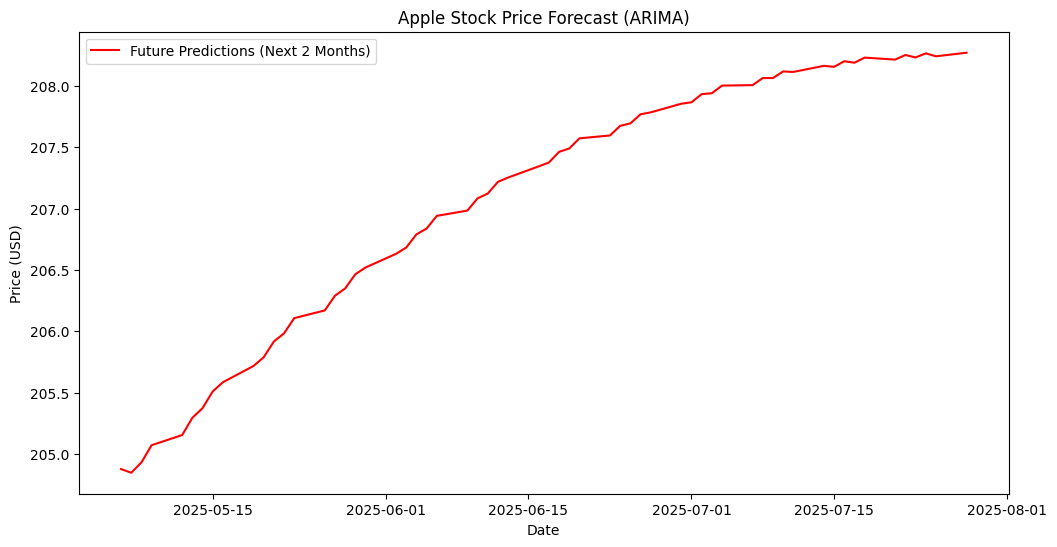

In [93]:
plt.figure(figsize=(12,6))


# Plot future predictions
plt.plot(future_predd, label='Future Predictions (Next 3 Months)', color='red')


# Title and labels
plt.title("Apple Stock Price Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()

plt.show()

###### Saving Model

In [98]:
import joblib

# Save the fitted ARIMA model
joblib.dump(modell_fit, "arima_apple_model.pkl")

# Later, load the saved model
loaded_model = joblib.load("arima_apple_model.pkl")

# Example: make predictions with loaded model
future_forecast = loaded_model.forecast(steps=10)
future_forecast.index = pd.date_range(start="2025-05-06", periods=len(future_forecast), freq="B")
print(future_forecast)

2025-05-06    204.877680
2025-05-07    204.848079
2025-05-08    204.931779
2025-05-09    205.072326
2025-05-12    205.155027
2025-05-13    205.295299
2025-05-14    205.374152
2025-05-15    205.510386
2025-05-16    205.585295
2025-05-19    205.717408
Freq: B, Name: predicted_mean, dtype: float64


##### 🔍 Insights

 1. **Stationarity Check**
   - The Augmented Dickey-Fuller (ADF) test returned:
     -  ADF Statistic: **-2.098**
     - p-value: **0.245**
   - Since p-value > 0.05, the series is **non-stationary** and required differencing.

2. **Best Model Selection**
   - After testing multiple parameter combinations, the best ARIMA order was found to be:
     - **ARIMA(3,2,3)**
     - Best AIC: **6312.51**
   - This indicates the model balances complexity and fit well.

3. **Model Evaluation**
   - On the test dataset, the model achieved:
     - **MAE:** 2.8149  
     - **RMSE:** 4.2445  
     - **MAPE:** 1.30%  
     - **Accuracy:** 98.70%  
   - Interpretation: The model was able to closely follow actual stock price movements, with high accuracy.

4. **Prediction Performance**
   - The **Actual vs Predicted plot** shows strong alignment between real stock prices and model predictions, confirming reliability for short-term forecasts.

5. **Future Forecast**
   - The model forecasted **60 business days (~3 months)** ahead from 2025-05-06.  
   - First 5 predicted values:
     ```
     2025-05-06    204.88
     2025-05-07    204.85
     2025-05-08    204.93
     2025-05-09    205.07
     2025-05-12    205.16
     ```
   - Last 5 predicted values:
     ```
     2025-07-22    208.25
     2025-07-23    208.23
     2025-07-24    208.26
     2025-07-25    208.24
     2025-07-28    208.27
     ```

6. **Key Takeaways**
   - Apple stock prices follow a **non-stationary upward trend**.  
   - ARIMA(3,2,3) provided a solid fit and captured both trend and short-term fluctuations.  
   - Model evaluation metrics indicate **high predictive accuracy**.  
   - Future predictions suggest a **gradual upward movement** with minor fluctuations, consistent with recent trends.  
   - ⚠️ **Disclaimer**: This forecast is for educational purposes only and should not be considered financial advice.